In [144]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.insert(0, '../../python')
from measurements import *
from scipy.interpolate import interp1d

from scipy.optimize import fsolve

plotter = Plotter()

from fitv2 import *


import h5py



#processedDataDir = "../data/processedv4/"


#This is the path to were you saved the processed correlators.
processedDataDir = "/home/superpions/processed_data/unbroken_H0/"
#processedDataDir = "../../python/"



gdir = '../../gnuplot_data/'


mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
mpl.rc('font', size = '14')

mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 

def ylabel(ax, label, fts = 14):
    ax.set_ylabel(label, fontsize=fts)
def xlabel(ax, label, fts = 14):
    ax.set_xlabel(label, fontsize=fts)       

#%load_ext gnuplot_kernel


dt=0.72
chi0 = 5.0


def getNameStr(m, v):
    res = "{}".format(m).split('.')
    mStr = "m-0" + res[0][1:] + res[1]
    while len(mStr)<9:
        mStr+='0'
    vStr = "{}".format(v)
    vStr = "N0" + vStr if v < 100 else "N" + vStr
    return "zeroHlongDiffuse_" + vStr + "_" + mStr + "_h000000_c00500"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:




volumes = [96]


masses = dict()
masses[volumes[0]] = [-4.78000,-4.76000,-4.73366,-4.72800, -4.72000,-4.71000,-4.70052, -4.68000] 
#masses[volumes[1]] = [-4.76000] 

mc = -4.81100

reducedMasses = dict()
for v in volumes:
    reducedMasses[v] = (mc - np.asarray(masses[v])) / mc


data=dict()
dataFn=dict()


for v in volumes:
    dataFn[v] = dict()
    data[v] = dict()

key = "phiRestored"

In [150]:
fitter = dict()

for v in volumes:
    for m in masses[v]:
        dataFn[v][m] = getNameStr(m, v)
        data[v][m] = ConfResults(fn="../../run_H0/" + dataFn[v][m] + "/" + dataFn[v][m] + ".h5" ,thTime=5000,dt=dt, data_format="new", processedDir=processedDataDir, plotDir=gdir,loadFourierBool = True)

In [151]:
for v in volumes:
    for m in masses[v]:
        data[v][m].load("OtOttp",key, direc=processedDataDir)
        data[v][m].load("OtOttp_blocks",key, direc=processedDataDir)
        data[v][m].load("OtOttpRatio",key, direc=processedDataDir)
        data[v][m].load("OtOttpRatio_blocks",key, direc=processedDataDir)

# Effective masses

In [152]:
effMasses = dict()
effMassesErr = dict()

for v in volumes:
    effMasses[v] = np.zeros(len(masses[v]))
    effMassesErr[v] = np.zeros(len(masses[v]))

In [153]:
def getEffMasses(mData, key, plateau, endPlateau):
    modelC = lambda par : par[0]
    res = mData.OtOttpRatio[key].mean[plateau:endPlateau:50]
    resErr = mData.OtOttpRatio[key].err[plateau:endPlateau:50]
    chi2C2 = lambda par : np.sum(np.square((res - modelC(par)) / resErr ))
    fitC2 = Minuit(chi2C2, [200.0], name=["b"])

    fitC2.errordef = Minuit.LEAST_SQUARES

    #fit.limits = []

    fitC2.migrad()
    fitC2.minos();

    return fitC2.values['b'], fitC2.errors['b']

/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:683: ComplexWarning: Casting complex values to real discards the imaginary part
  fm = migrad(ncall, self._tolerance)
/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:1370: ComplexWarning: Casting complex values to real discards the imaginary part
  me = minos(self._var2pos[par], ncall, self._tolerance)


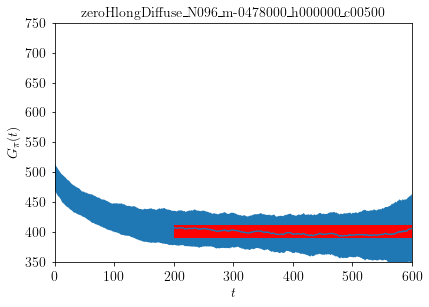

In [154]:
plateau = 200
endPlateau = 600

index = 0

v = volumes[0]
m = masses[v][index]


effMasses[v][index], effMassesErr[v][index] = getEffMasses(data[v][m], key, plateau, endPlateau)

plt.figure(index)
plotter.plot(data[v][m],"OtOttpRatio", key)
#plt.yscale('log')
plt.title(dataFn[v][m], fontsize=14)
xlabel(plt.gca(), "$t$")
ylabel(plt.gca(), "$G_\pi(t)$")
plt.xlim([0,endPlateau])
plt.ylim([350,750])


xs = [plateau,endPlateau]
ys = np.asarray([effMasses[v][index], effMasses[v][index]])
errs = np.asarray([effMassesErr[v][index], effMassesErr[v][index]])

plt.fill_between(xs, ys - errs,ys + errs, linewidth=0, zorder=1, color='r')



/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:683: ComplexWarning: Casting complex values to real discards the imaginary part
  fm = migrad(ncall, self._tolerance)
/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:1370: ComplexWarning: Casting complex values to real discards the imaginary part
  me = minos(self._var2pos[par], ncall, self._tolerance)


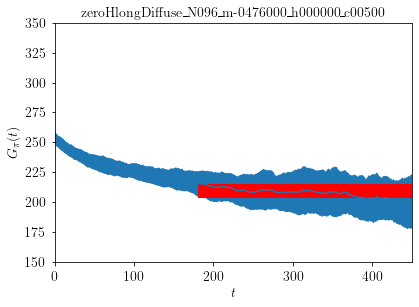

In [155]:
plateau = 180
endPlateau = 450

index = 1

v = volumes[0]
m = masses[v][index]


effMasses[v][index], effMassesErr[v][index] = getEffMasses(data[v][m], key, plateau, endPlateau)

plt.figure(index)
plotter.plot(data[v][m],"OtOttpRatio", key)
#plt.yscale('log')
plt.title(dataFn[v][m], fontsize=14)
xlabel(plt.gca(), "$t$")
ylabel(plt.gca(), "$G_\pi(t)$")
plt.xlim([0,endPlateau])
plt.ylim([150,350])


xs = [plateau,endPlateau]
ys = np.asarray([effMasses[v][index], effMasses[v][index]])
errs = np.asarray([effMassesErr[v][index], effMassesErr[v][index]])

plt.fill_between(xs, ys - errs,ys + errs, linewidth=0, zorder=1, color='r')



/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:683: ComplexWarning: Casting complex values to real discards the imaginary part
  fm = migrad(ncall, self._tolerance)
/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:1370: ComplexWarning: Casting complex values to real discards the imaginary part
  me = minos(self._var2pos[par], ncall, self._tolerance)


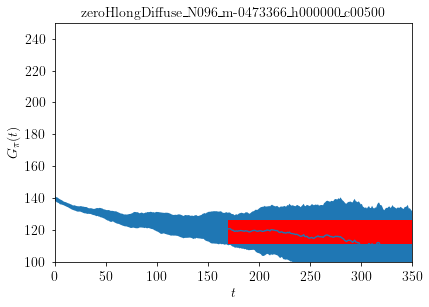

In [156]:
plateau = 170
endPlateau = 350

index = 2

v = volumes[0]
m = masses[v][index]


effMasses[v][index], effMassesErr[v][index] = getEffMasses(data[v][m], key, plateau, endPlateau)

plt.figure(index)
plotter.plot(data[v][m],"OtOttpRatio", key)
#plt.yscale('log')
plt.title(dataFn[v][m], fontsize=14)
xlabel(plt.gca(), "$t$")
ylabel(plt.gca(), "$G_\pi(t)$")
plt.xlim([0,endPlateau])
plt.ylim([100,250])


xs = [plateau,endPlateau]
ys = np.asarray([effMasses[v][index], effMasses[v][index]])
errs = np.asarray([effMassesErr[v][index], effMassesErr[v][index]])

plt.fill_between(xs, ys - errs,ys + errs, linewidth=0, zorder=1, color='r')



/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:683: ComplexWarning: Casting complex values to real discards the imaginary part
  fm = migrad(ncall, self._tolerance)
/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:1370: ComplexWarning: Casting complex values to real discards the imaginary part
  me = minos(self._var2pos[par], ncall, self._tolerance)


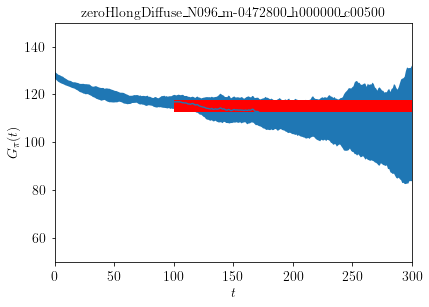

In [157]:
plateau = 100
endPlateau = 300

index = 3

v = volumes[0]
m = masses[v][index]


effMasses[v][index], effMassesErr[v][index] = getEffMasses(data[v][m], key, plateau, endPlateau)

plt.figure(index)
plotter.plot(data[v][m],"OtOttpRatio", key)
#plt.yscale('log')
plt.title(dataFn[v][m], fontsize=14)
xlabel(plt.gca(), "$t$")
ylabel(plt.gca(), "$G_\pi(t)$")
plt.xlim([0,endPlateau])
plt.ylim([50,150])


xs = [plateau,endPlateau]
ys = np.asarray([effMasses[v][index], effMasses[v][index]])
errs = np.asarray([effMassesErr[v][index], effMassesErr[v][index]])

plt.fill_between(xs, ys - errs,ys + errs, linewidth=0, zorder=1, color='r')



/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:683: ComplexWarning: Casting complex values to real discards the imaginary part
  fm = migrad(ncall, self._tolerance)
/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:1370: ComplexWarning: Casting complex values to real discards the imaginary part
  me = minos(self._var2pos[par], ncall, self._tolerance)


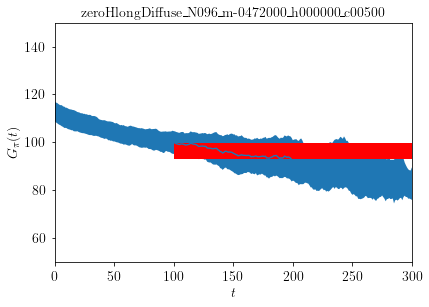

In [158]:
plateau = 100
endPlateau = 300

index = 4

v = volumes[0]
m = masses[v][index]


effMasses[v][index], effMassesErr[v][index] = getEffMasses(data[v][m], key, plateau, endPlateau)

plt.figure(index)
plotter.plot(data[v][m],"OtOttpRatio", key)
#plt.yscale('log')
plt.title(dataFn[v][m], fontsize=14)
xlabel(plt.gca(), "$t$")
ylabel(plt.gca(), "$G_\pi(t)$")
plt.xlim([0,endPlateau])
plt.ylim([50,150])


xs = [plateau,endPlateau]
ys = np.asarray([effMasses[v][index], effMasses[v][index]])
errs = np.asarray([effMassesErr[v][index], effMassesErr[v][index]])

plt.fill_between(xs, ys - errs,ys + errs, linewidth=0, zorder=1, color='r')



/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:683: ComplexWarning: Casting complex values to real discards the imaginary part
  fm = migrad(ncall, self._tolerance)
/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:1370: ComplexWarning: Casting complex values to real discards the imaginary part
  me = minos(self._var2pos[par], ncall, self._tolerance)


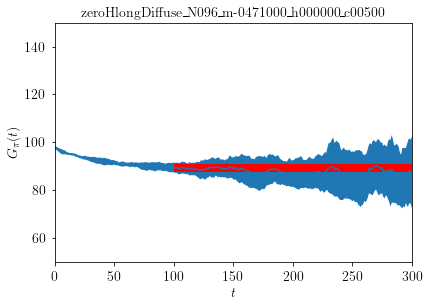

In [159]:
plateau = 100
endPlateau = 300

index = 5

v = volumes[0]
m = masses[v][index]


effMasses[v][index], effMassesErr[v][index] = getEffMasses(data[v][m], key, plateau, endPlateau)

plt.figure(index)
plotter.plot(data[v][m],"OtOttpRatio", key)
#plt.yscale('log')
plt.title(dataFn[v][m], fontsize=14)
xlabel(plt.gca(), "$t$")
ylabel(plt.gca(), "$G_\pi(t)$")
plt.xlim([0,endPlateau])
plt.ylim([50,150])


xs = [plateau,endPlateau]
ys = np.asarray([effMasses[v][index], effMasses[v][index]])
errs = np.asarray([effMassesErr[v][index], effMassesErr[v][index]])

plt.fill_between(xs, ys - errs,ys + errs, linewidth=0, zorder=1, color='r')



/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:683: ComplexWarning: Casting complex values to real discards the imaginary part
  fm = migrad(ncall, self._tolerance)
/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:1370: ComplexWarning: Casting complex values to real discards the imaginary part
  me = minos(self._var2pos[par], ncall, self._tolerance)


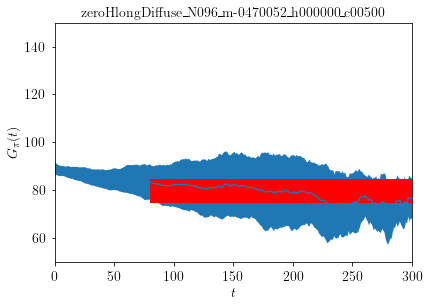

In [160]:
plateau = 80
endPlateau = 300

index = 6

v = volumes[0]
m = masses[v][index]


effMasses[v][index], effMassesErr[v][index] = getEffMasses(data[v][m], key, plateau, endPlateau)

plt.figure(index)
plotter.plot(data[v][m],"OtOttpRatio", key)
#plt.yscale('log')
plt.title(dataFn[v][m], fontsize=14)
xlabel(plt.gca(), "$t$")
ylabel(plt.gca(), "$G_\pi(t)$")
plt.xlim([0,endPlateau])
plt.ylim([50,150])


xs = [plateau,endPlateau]
ys = np.asarray([effMasses[v][index], effMasses[v][index]])
errs = np.asarray([effMassesErr[v][index], effMassesErr[v][index]])

plt.fill_between(xs, ys - errs,ys + errs, linewidth=0, zorder=1, color='r')



/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:683: ComplexWarning: Casting complex values to real discards the imaginary part
  fm = migrad(ncall, self._tolerance)
/home/adrienflorio/.local/lib/python3.8/site-packages/iminuit/minuit.py:1370: ComplexWarning: Casting complex values to real discards the imaginary part
  me = minos(self._var2pos[par], ncall, self._tolerance)


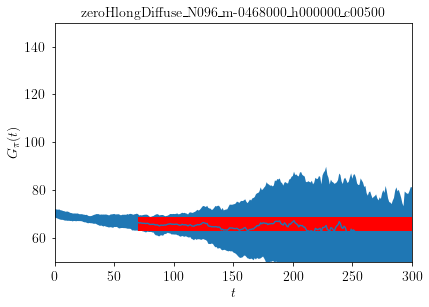

In [161]:
plateau = 70
endPlateau = 300

index = 7

v = volumes[0]
m = masses[v][index]


effMasses[v][index], effMassesErr[v][index] = getEffMasses(data[v][m], key, plateau, endPlateau)

plt.figure(index)
plotter.plot(data[v][m],"OtOttpRatio", key)
#plt.yscale('log')
plt.title(dataFn[v][m], fontsize=14)
xlabel(plt.gca(), "$t$")
ylabel(plt.gca(), "$G_\pi(t)$")
plt.xlim([0,endPlateau])
plt.ylim([50,150])


xs = [plateau,endPlateau]
ys = np.asarray([effMasses[v][index], effMasses[v][index]])
errs = np.asarray([effMassesErr[v][index], effMassesErr[v][index]])

plt.fill_between(xs, ys - errs,ys + errs, linewidth=0, zorder=1, color='r')



In [162]:
plateau = 150
endPlateau = 450

index = 0

v = volumes[1]
m = masses[v][index]


effMasses[v][index], effMassesErr[v][index] = getEffMasses(data[v][m], key, plateau, endPlateau)

plt.figure(index)
plotter.plot(data[v][m],"OtOttpRatio", key)
#plt.yscale('log')
plt.title(dataFn[v][m], fontsize=14)
xlabel(plt.gca(), "$t$")
ylabel(plt.gca(), "$G_\pi(t)$")
plt.xlim([0,endPlateau])
plt.ylim([150,350])


xs = [plateau,endPlateau]
ys = np.asarray([effMasses[v][index], effMasses[v][index]])
errs = np.asarray([effMassesErr[v][index], effMassesErr[v][index]])

plt.fill_between(xs, ys - errs,ys + errs, linewidth=0, zorder=1, color='r')



IndexError: list index out of range

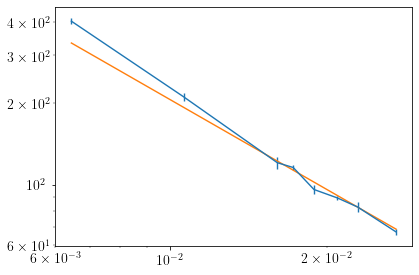

In [ ]:
plt.errorbar(reducedMasses[volumes[0]][:], effMasses[volumes[0]][:], effMassesErr[volumes[0]][:])
#plt.errorbar(reducedMasses[volumes[1]][:], effMasses[volumes[1]][:], effMassesErr[volumes[1]][:])
plt.yscale('log')
plt.xscale('log')
plt.plot(reducedMasses[volumes[0]][:],1.31*reducedMasses[volumes[0]][:]**(-1.098) )


# 1/e

In [ ]:
def getDecayTime(data, key):
    x,y = data.getObs("OtOttp", key)
    f = interp1d(x,y.mean / y.mean[0])
    fErrP = interp1d(x,(y.mean + y.err) / (y.mean[0] + y.err[0]))
    fErrM = interp1d(x,(y.mean - y.err) / (y.mean[0] - y.err[0]))
    res = fsolve(lambda x : np.real(f(x)) - 1.0 / np.exp(1), 10.0)
    err1 = fsolve(lambda x : np.real(fErrP(x)) - 1.0 / np.exp(1), 10.0)
    err2 = fsolve(lambda x : np.real(fErrM(x)) - 1.0 / np.exp(1), 10.0)
    err = max(abs(err1-res), abs(res - err2))
    return res[0], err[0]


In [ ]:
effMassesBis = dict()
effMassesErrBis = dict()

for v in volumes:
    effMassesBis[v] = np.zeros(len(masses[v]))
    effMassesErrBis[v] = np.zeros(len(masses[v]))
for v in volumes:
    count = 0
    for m in masses[v]:
        effMassesBis[v][count], effMassesErrBis[v][count] = getDecayTime(data[v][m], key)
        count += 1

/home/adrienflorio/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


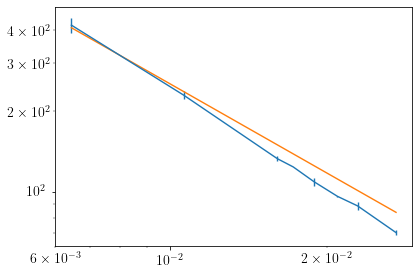

In [163]:
for v in volumes:
    plt.errorbar(reducedMasses[v][:], effMassesBis[v][:], effMassesErrBis[v][:])
plt.yscale('log')
plt.xscale('log')
plt.plot(reducedMasses[volumes[0]][:],1.60*reducedMasses[volumes[0]][:]**(-1.098) )


In [ ]:
effMassesErrBis

array([26.29196763,  7.42638717,  2.67911322,  0.19513458,  3.76707414,
        0.27027796,  2.69206517,  1.67891965])